# Functions

In [127]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [111]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def fill_missing_values(df_to_fill):
    df_to_fill.dropna(how='all')
    df_to_fill = df_to_fill.apply(lambda x: x.fillna(x.mean()),axis=0)
    # print(df_to_fill)
    return df_to_fill

In [ ]:
def convert_string_value_to_int(df_to_fill,mapping, cols):
  # mapping = {'set': 1, 'test': 2}
  for c in cols:
    df_to_fill = df_to_fill.replace({c: mapping})
  # print(df_to_fill)
  return df_to_fill

In [ ]:
def iteration(df_train, df_test, max_depth, label_column_name, features_columns_names, threshold=0.95):
    if(len(df_test)==0):
        return pd.DataFrame(), [] , [] , []

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=max_depth)

    X_train = df_train[features_columns_names]
    y_train = df_train[label_column_name]
    X_test = df_test[features_columns_names]
    y_test = df_test[label_column_name]

    # Train Decision Tree Classifer
    clf = clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_proba = clf.predict_proba(X_test)

    y_test = np.array(y_test)

    df_underThreshold = pd.DataFrame()
    y_underThreshold_test = []
    y_overThreshold_proba = []
    y_overThreshold_test = []

    i = 0
    for index, row in X_test.iterrows():
        if (np.max(y_proba[i]) > threshold):
            # for log-loss caclulation after 15 iterations
            y_overThreshold_proba.append(y_proba[i])
            y_overThreshold_test.append(y_test[i])
        else:
            df_underThreshold = df_underThreshold.append(row)
            y_underThreshold_test.append(y_test[i])

        i = i + 1
    return df_underThreshold, y_underThreshold_test, y_overThreshold_proba, y_overThreshold_test

In [205]:
def cascadingAlgorithm(label, columnsNames, X_train, y_train,X_test, y_test, max_iterations=15, threshold=0.95):
    X_train[label] = np.array(y_train).copy()
    X_test[label] = np.array(y_test).copy()
    df_train = X_train.copy()
    df_test = X_test.copy()

    #data for later caculation of log-loss metric
    final_y_overThreshold_proba = []
    final_y_overThreshold_test = []

    for j in range(1,max_iterations+1):
        df_underThreshold, y_underThreshold_test, y_overThreshold_proba, y_overThreshold_test = iteration(df_train, df_test, j,label,columnsNames, threshold)
        df_test = df_underThreshold
        df_test[label] = y_underThreshold_test
        final_y_overThreshold_proba.extend(y_overThreshold_proba)
        final_y_overThreshold_test.extend(y_overThreshold_test)

    evaluation = log_loss(final_y_overThreshold_test,final_y_overThreshold_proba)
    print("log-loss:",evaluation)
    return evaluation

In [206]:
def calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test):
  a = cascadingAlgorithm(label, columnsNames, X_train, y_train,X_test, y_test, 15, 0.95)
  b = cascadingAlgorithm(label, columnsNames, X_train, y_train,X_test, y_test, 20, 0.95)
  c = cascadingAlgorithm(label, columnsNames, X_train, y_train,X_test, y_test, 15, 0.98)
  return a,b,c


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
#pima = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv", header=0, names=col_names)
pima = pd.read_csv("/tmp/data/cosmetics.csv", header=0, names=col_names)

#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [214]:
#plot
def get_graph(y,title):
  x = np.array(['basic', "improved 1", "improved 2"])
  plt.bar(x,y)
  plt.title(title)
  plt.show()


# /1_V_v/bank.csv


In [282]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/1_V_v/bank.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/1_V_v/bank.csv", header=0, names=col_names)
# pima = fill_missing_values(pima)

pima = pd.get_dummies(pima)
pima.head()

pima = fill_missing_values(pima)

pima = pima.head(20000)

print("pima.first:")
print(list(pima.columns.values))

print(pima)
#split dataset in features and target variable
feature_cols =  list(pima.columns.values)
feature_cols.remove('day')
X = pima[feature_cols] # Features
y = pima.day # Target variable

pima.first:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'deposit_no', 'deposit_yes']
       age  balance  day  ...  poutcome_unknown  deposit_no  deposit_yes
0       59     2343    5  ...                 1           0            1
1       56       

In [283]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [284]:
label = 'day'
columnsNames = feature_cols


In [285]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 28.606508520197696
log-loss: 30.014766984083554
log-loss: 28.389262188038106


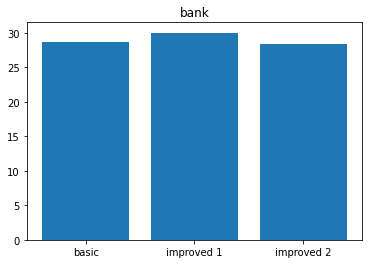

In [286]:
y = [a, b, c]
get_graph(y,'bank')


In [ ]:
cascadingAlgorithm(label, columnsNames, X_train, y_train,X_test, y_test, 15, 0.98)

log-loss: 4.6122855169291315


# 2/Placement_Data_Full_Class.csv

In [481]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/2_V_v/Placement_Data_Full_Class.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/2_V_v/Placement_Data_Full_Class.csv", header=0, names=col_names)
# pima = fill_missing_values(pima)
mapping = {'Others': 1, 'Central': 2}
cols = ['ssc_b', 'hsc_b']
pima = convert_string_value_to_int(pima,mapping, cols)
mapping = {'M': 1, 'F': 2}
cols = ['gender']
pima = convert_string_value_to_int(pima,mapping, cols)
mapping = {'Commerce': 1, 'Science': 2, 'Arts':3}
cols = ['hsc_s']
pima = convert_string_value_to_int(pima,mapping, cols)
mapping = {'Sci&Tech': 1, 'Comm&Mgmt': 2}
cols = ['degree_t']
pima = convert_string_value_to_int(pima,mapping, cols)
mapping = {'No': 1, 'Yes': 2}
cols = ['workex']
pima = convert_string_value_to_int(pima,mapping, cols)
mapping = {'Mkt&HR': 1, 'Mkt&Fin': 2}
cols = ['specialisation']
pima = convert_string_value_to_int(pima,mapping, cols)
mapping = {'Placed': 1, 'Not Placed': 2}
cols = ['status']
pima = convert_string_value_to_int(pima,mapping, cols)

mapping = {None: 0}
cols = ['salary']
pima = convert_string_value_to_int(pima,mapping, cols)

pima = pd.get_dummies(pima)
pima.head()


# pima = fill_missing_values(pima)

print(list(pima.columns.values))

feature_cols = list(pima.columns.values)
feature_cols.remove('gender')
print(feature_cols)
#split dataset in features and target variable
# feature_cols =  ['gender','ssc_p','ssc_b','hsc_p','hsc_b','hsc_s','degree_p','degree_t','workex','etest_p','specialisation','mba_p','salary']
X = pima[feature_cols] # Features
y = pima.gender # Target variable

['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary', 'degree_t_1', 'degree_t_2', 'degree_t_Others']
['ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary', 'degree_t_1', 'degree_t_2', 'degree_t_Others']


In [482]:
print(pima)

     gender  ssc_p  ssc_b  ...  degree_t_1  degree_t_2  degree_t_Others
0         1  67.00      1  ...           1           0                0
1         1  79.33      2  ...           1           0                0
2         1  65.00      2  ...           0           1                0
3         1  56.00      2  ...           1           0                0
4         1  85.80      2  ...           0           1                0
..      ...    ...    ...  ...         ...         ...              ...
210       1  80.60      1  ...           0           1                0
211       1  58.00      1  ...           1           0                0
212       1  67.00      1  ...           0           1                0
213       2  74.00      1  ...           0           1                0
214       1  62.00      2  ...           0           1                0

[215 rows x 16 columns]


In [483]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [484]:
label = 'gender'
columnsNames = feature_cols

In [485]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 4.147865356637085
log-loss: 4.679231147328019
log-loss: 9.564584232436804


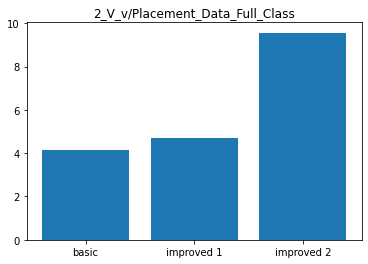

In [486]:
y = np.array([a, b, c])
get_graph(y,'2_V_v/Placement_Data_Full_Class' )

# /tmp/data/3/water_potability.csv

In [193]:

col_names = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
# load dataset
#pima = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv", header=0, names=col_names)
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/3_V_v/water_potability.csv", header=0, names=col_names)
pima = fill_missing_values(pima)

#split dataset in features and target variable
feature_cols =  ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
X = pima[feature_cols] # Features
y = pima.Potability # Target variable

In [194]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [195]:
label = 'Potability'
columnsNames = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

In [207]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 11.0403346257286
log-loss: 12.101697164202182
log-loss: 14.231341775687337


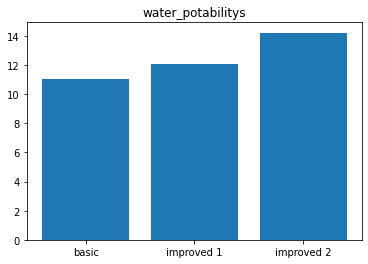

In [216]:
y = [a, b, c]
get_graph(y,'water_potabilitys' )


# /4_V/cosmetics.csv

In [440]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/4_V/cosmetics.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/4_V/cosmetics.csv", header=0, names=col_names)



# pima =pima.head(2000)

# mapping = {None: 0}
# cols = ['building_floor_count']
# pima = convert_string_value_to_int(pima,mapping, cols)

print(pima)
pima = pd.get_dummies(pima)

print("pima.first:")
print(list(pima.columns.values))


            Label                          Brand  ... Oily  Sensitive
0     Moisturizer                         LA MER  ...    1          1
1     Moisturizer                          SK-II  ...    1          1
2     Moisturizer                 DRUNK ELEPHANT  ...    1          0
3     Moisturizer                         LA MER  ...    1          1
4     Moisturizer                   IT COSMETICS  ...    1          1
...           ...                            ...  ...  ...        ...
1467  Sun protect                         KORRES  ...    1          1
1468  Sun protect                KATE SOMERVILLE  ...    0          0
1469  Sun protect                  VITA LIBERATA  ...    0          0
1470  Sun protect  ST. TROPEZ TANNING ESSENTIALS  ...    0          0
1471  Sun protect                     DERMAFLASH  ...    1          1

[1472 rows x 11 columns]
pima.first:
['Price', 'Rank', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Label_Cleanser', 'Label_Eye cream', 'Label_Face Ma

In [441]:
print(pima)

      Price  ...  Ingredients_Zingiber Officinale (Ginger) Water, Water, Glycerin, Squalane, Butylene Glycol, Limnanthes Alba (Meadowfoam) Seed Oil, Pentylene Glycol, Polyglycerin-3, Steareth-21, Glyceryl Stearate, Helianthus Annuus (Sunflower) Seed Oil, Zingiber Zerumbet Extract, Panax Notoginseng Root Extract, Alpinia Galanga Leaf Extract, Commiphora Mukul Resin Extract, Echinacea Purpurea Extract, Calophyllum Inophyllum Seed Oil, Zingiber Officinale (Ginger) Root Extract, Panax Ginseng Root Extract, Adenosine, Tocopherol, Steareth-2, Caprylic/Capric Triglyceride, Polyacrylamide, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, C13-14 Isoparaffin, Fragrance, Xanthan Gum, Tromethamine, Tetrasodium EDTA, Caramel, Laureth-7, BHT, Sodium Metabisulfite, Phenoxyethanol, Benzyl Salicylate.
0       175  ...                                                  0                                                                                                                                            

In [442]:
#split dataset in features and target variable
feature_cols = list(pima.columns.values)
feature_cols.remove('Normal')
# feature_cols = ['Brand','Name','Price','Rank','Ingredients','Combination','Dry','Normal','Oily','Sensitive']
X = pima[feature_cols] # Features
y = pima.Normal # Target variable

In [443]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [444]:
label = 'Normal'
columnsNames = feature_cols

In [445]:
X_train

,Price,Rank,Combination,Dry,Oily,Sensitive,Label_Cleanser,Label_Eye cream,Label_Face Mask,Label_Moisturizer,Label_Sun protect,Label_Treatment,Brand_ALGENIST,Brand_AMOREPACIFIC,Brand_ANTHONY,Brand_APIVITA,Brand_BAREMINERALS,Brand_BEAUTYBIO,Brand_BECCA,Brand_BELIF,Brand_BIOEFFECT,Brand_BIOSSANCE,Brand_BLACK UP,Brand_BLITHE,Brand_BOBBI BROWN,Brand_BOSCIA,Brand_CANE + AUSTIN,Brand_CAUDALIE,Brand_CHARLOTTE TILBURY,Brand_CLARINS,Brand_CLARISONIC,Brand_CLINIQUE,Brand_COOLA,Brand_COVER FX,Brand_DERMADOCTOR,Brand_DERMAFLASH,Brand_DIOR,Brand_DR ROEBUCK’S,Brand_DR. BRANDT SKINCARE,Brand_DR. DENNIS GROSS SKINCARE,...,"Ingredients_Water, Solum Fullonum (Fuller's Earth), Kaolin, Glycerin, Bam- busa Arundinacea Stem Extract, Butylene Glycol, Olea Europaea (Olive) Seed Powder, Pentylene Glycol, Hydroxyethyl Acrylate/ Sodium Acryloyldimethyl Tau- rate Copolymer, Cocamidopro- pyl Betaine, Vitis Vinifera (Grape) Seed Oil, Olea Euro- paea (Olive) Leaf Extract, San- talum Album (Sandalwood) Oil, Lavandula Angustifolia (Lavender) Flower Water, An- themis Nobilis Flower Oil, Citrus Medica Limonum (Lemon) Fruit Extract, Amyris Balsamifera Bark Oil, Spiraea Ulmaria Extract, Fusanus Spica- tus Wood Oil, Tocopheryl Ac- etate, Citric Acid, Sodium Chlo- ride, Xanthan Gum, Polysor- bate 60, Sorbitan Isostearate, Fragrance, BHT, Phenoxyethanol, Linalool.","Ingredients_Water, Sorbitan Oleate Decyl-Glucoside Crosspolymer, Cocyl Arginine Amide, Myristoyl Tetrapeptide-13, Myristoyl, Hexapeptide-23, Glyceryl Caprylate, Syringa Vulgaris (Lilac) Extract, Pelargonium Graveolens Flower Essential Oil, Lavandula Angustifolia (Lavender) Essential Oil, Guar Hydroxypropyltrimonium Chloride, 1,2-Hexanediol, Maltodextrin, Cymbopogon Schoenanthus Essential Oil, Polysorbate 60, Caprylyl Glycol, Cedrus Atlantica Bark (Cedarwood) Essential Oil, Polysorbate 80, Simethicone, Citric Acid.","Ingredients_Water, Sorbitol, Dipropylene Glycol, Oleth-20, Glycerin, Panthenol, Butylene Glycol, Propylene Glycol, Parfum (Fragrance),PEG-8, Alpha-Glucan Oligosaccharide, PEG-32, Lactic Acid, Carbomer, Tilia Cordata Wood Extract, Tocopheryl Acetate, Anthemis Nobilis Flower Extract, Bletia Hycinthina Bulb Extract, Retinyl Palmitate, Helianthus Annuus (Sunflower) Seed Oil, Phenoxyethanol, Methylparaben, Sodium Citrate, Disodium EDTA, BHT, Limonene, Linalool, Geraniol, Citral, Citronellol, CI 19140/Yellow 5.","Ingredients_Water, Sorbitol, Glycerin, Butylene Glycol, Titanium Dioxide, Pentylene Glycol, Magnesium Aluminum Silicate, Carbomer, PVP, Aluminum Silicate, Hydrogenated Lecithin, Potassium Hydroxide, Sodium Trideceth-4 Carboxylate, Ascorbyl Glucoside, Tocopherol, Hydroxyapatite, Scutellaria Baicalensis Root Extract, Aluminum Hydroxide, Potassium DNA, Dipotassium Glycyrrhizate, Panax Ginseng Root Extract, Sodium Hyaluronate, Equisetum Arvense Extract, Morus Alba Root Extract, Pueraria Lobata Root Extract, Natto Gum, Aloe Barbadensis Leaf Extract, Chlorella Vulgaris Extract, Cynara Scolymus (Artichoke) Leaf Extract.","Ingredients_Water, Squalane*, Butylene Glycol*, Glycerin*, C14-22 Alcohols*, Ethylhexylglycerin, Ascorbyl Tetraisopalmitate, Polyacrylate Crosspolymer-6, Parfum (Fragrance), Tocopherol*, Glyceryl Stearate Se*, Palmitoyl Grape Seed Extract*, C12-20 Alkyl Glucoside*, Hydrolyzed Hyaluronic Acid , Phenylpropanol, Picea Abies Extract*, Propanediol*, Acacia Senegal Gum*, Caprylyl Glycol, Xanthan Gum, Sodium Phytate*, Citric Acid* (193/031) *. Plant Origin.","Ingredients_Water, Squalane, Dimethicone, Propanediol, Glycerin, Diisostearyl Malate, Oryza Sativa (Rice) Bran Wax, Behenyl Alcohol, Saccharomyces/Camellia Sinensis Leaf/Cladosiphon Okamuranus/Rice Ferment Filtrate*, Indigofera Tinctoria Leaf Extract, Polygonum Tinctorium Leaf/Stem Extract, Avena Sativa (Oat) Kernel Extract, Sophora Japonica Flower Extract, Oryza Sativa (Rice) Germ Oil, Cocos Nucifera (Coconut) Oil, Inositol, Sericin, Tetrasodium Tetracarboxymethyl Naringeninchalcone, Amorphophallus Konjac Root Powder, Sodium Hyalu

In [446]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 0.1630855328283724
log-loss: 0.1630855328283724
log-loss: 0.8104087094365883


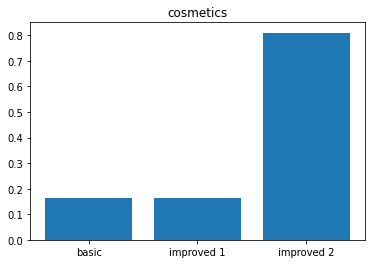

In [448]:
y = np.array([a, b, c])
get_graph(y,'cosmetics' )

# /tmp/data/5/customer_data.csv

In [236]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/5_V/customer_data.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/5_V/customer_data.csv", header=0, names=col_names)
pima = fill_missing_values(pima)

pima = fill_missing_values(pima)

pima = pd.get_dummies(pima)
pima.head()

print(pima)

print("pima.first:")
print(list(pima.columns.values))

#split dataset in features and target variable
feature_cols =  list(pima.columns.values)
feature_cols.remove('label')
X = pima[feature_cols] # Features
y = pima.label # Target variable

      label  fea_1        fea_2  fea_3  ...  fea_8  fea_9  fea_10      fea_11
0         1      5  1245.500000      3  ...    109      5  151300  244.948974
1         0      4  1277.000000      1  ...    100      3  341759  207.173840
2         0      7  1298.000000      1  ...    101      5   72001    1.000000
3         1      7  1335.500000      1  ...    110      3   60084    1.000000
4         0      7  1283.911373      2  ...    108      4  450081  197.403141
...     ...    ...          ...    ...  ...    ...    ...     ...         ...
1120      0      5  1289.000000      1  ...    112      3  350702  200.000000
1121      0      5  1283.911373      2  ...    108      4  450000  169.000000
1122      0      7  1220.000000      3  ...     90      5   71002    1.000000
1123      0      4  1250.000000      3  ...     90      5   72000    1.000000
1124      0      4  1415.000000      3  ...    113      4  151300  273.861279

[1125 rows x 12 columns]
pima.first:
['label', 'fea_1', 'fea_2'

In [237]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [238]:
label = 'label'
columnsNames = ['fea_1','fea_2','fea_3','fea_4','fea_5','fea_6','fea_7','fea_8','fea_9','fea_10','fea_11']

In [239]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 9.05798788839209
log-loss: 8.649376486566434
log-loss: 10.15570860334655


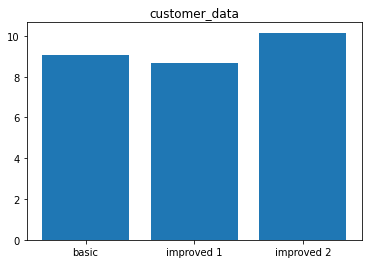

In [241]:
y = np.array([a, b, c])
get_graph(y,'customer_data' )

# /tmp/6/csgo_round_snapshots.csv

In [242]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/6_V/csgo_round_snapshots.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/6_V/csgo_round_snapshots.csv", header=0, names=col_names)
# pima = fill_missing_values(pima)



pima = pd.get_dummies(pima)
pima.head()

pima = fill_missing_values(pima)

pima = pima.head(2000)

print(pima)

print("pima.first:")
print(list(pima.columns.values))

#split dataset in features and target variable
feature_cols =  list(pima.columns.values)
feature_cols.remove('ct_score')
X = pima[feature_cols] # Features
y = pima.ct_score # Target variable

      time_left  ct_score  ...  round_winner_CT  round_winner_T
0        175.00         0  ...                1               0
1        156.03         0  ...                1               0
2         96.03         0  ...                1               0
3         76.03         0  ...                1               0
4        174.97         1  ...                1               0
...         ...       ...  ...              ...             ...
1995      74.90         7  ...                0               1
1996      31.23         7  ...                0               1
1997      11.23         7  ...                0               1
1998     174.91         7  ...                0               1
1999     114.90         7  ...                1               0

[2000 rows x 97 columns]
pima.first:
['time_left', 'ct_score', 't_score', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_pl

In [243]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [244]:
label = 'ct_score'
columnsNames = feature_cols

In [245]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 8.52613631522734
log-loss: 9.664267671805957
log-loss: 8.33934238911326


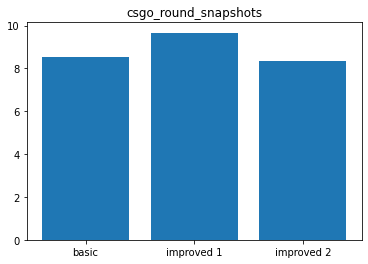

In [246]:
y = np.array([a, b, c])
get_graph(y,'csgo_round_snapshots' )

# /7_V/Classification of Robots from their conversation sequence.csv

In [247]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/7_V/Classification of Robots from their conversation sequence.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/7_V/Classification of Robots from their conversation sequence.csv", header=0, names=col_names)
# pima = fill_missing_values(pima)



pima = pd.get_dummies(pima)
pima.head()

pima = fill_missing_values(pima)

print(pima)

pima = pima.head(2000)

print("pima.first:")
print(list(pima.columns.values))

#split dataset in features and target variable
feature_cols =  list(pima.columns.values)
feature_cols.remove('source')
X = pima[feature_cols] # Features
y = pima.source # Target variable

        source   num1    num2  ...        num8         num9        num10
0            0      2       5  ...           8            1            3
1            1   1747    1749  ...        1774         1783         1785
2            2  65056  195168  ...  6745006080   6745006080   6745006080
3            3   2855    2860  ...        2890         2895         2900
4            4  11440   57200  ...   893750000   4468750000  22343750000
...        ...    ...     ...  ...         ...          ...          ...
499995       0      8       1  ...           4            4            5
499996       1   4882    4886  ...        4912         4920         4924
499997       2  32796   32796  ...   159388560    318777120   2231439840
499998       3   7751    7756  ...        7786         7791         7796
499999       4  27545  137725  ...  2151953125  10759765625  53798828125

[500000 rows x 11 columns]
pima.first:
['source', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8', 'num9', '

In [248]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [249]:
label = 'source'
columnsNames = feature_cols

In [250]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 2.295590958931524
log-loss: 3.9919022592832696
log-loss: 2.7910122339321806


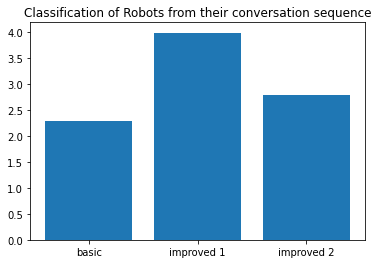

In [251]:
y = np.array([a, b, c])
get_graph(y,'Classification of Robots from their conversation sequence' )

# /8_V/income_evaluation.csv

In [291]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/8_V/healthcare-dataset-stroke-data.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/8_V/healthcare-dataset-stroke-data.csv", header=0, names=col_names)
# pima = fill_missing_values(pima)

pima = pd.get_dummies(pima)
pima.head()

pima = fill_missing_values(pima)


# pima = pima.head(5000)

print("pima.first:")
print(list(pima.columns.values))

print(pima)
#split dataset in features and target variable
feature_cols =  list(pima.columns.values)

feature_cols.remove('stroke')
X = pima[feature_cols] # Features
y = pima['stroke'] # Target variable

pima.first:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
       age  hypertension  ...  smoking_status_never smoked  smoking_status_smokes
0     67.0             0  ...                            0                      0
1     61.0             0  ...                            1                      0
2     80.0             0  ...                            1                      0
3     49.0             0  ...                            0                      1
4     79.0             1  ...                            1                      0
...    ...           ...  ...                   

In [292]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [293]:
label = 'stroke'
columnsNames = feature_cols

In [294]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 1.300686099288343
log-loss: 1.3589436218536135
log-loss: 2.272063978602387


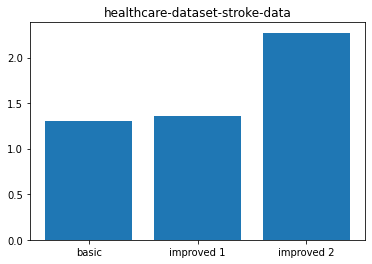

In [295]:
y = np.array([a, b, c])
get_graph(y,'healthcare-dataset-stroke-data' )

# /9_V/spambase_csv.csv

In [257]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/9_V/spambase_csv.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/9_V/spambase_csv.csv", header=0, names=col_names)
# pima = fill_missing_values(pima)



pima = pd.get_dummies(pima)
pima.head()

pima = fill_missing_values(pima)



# pima = pima.head(2000)

print("pima.first:")
print(list(pima.columns.values))

print(pima)
#split dataset in features and target variable
feature_cols =  list(pima.columns.values)
f = 'age'
feature_cols.remove('class')
X = pima[feature_cols] # Features
y = pima['class'] # Target variable

pima.first:
['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 

In [258]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [259]:
label = 'class'
columnsNames = feature_cols

In [260]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 1.383554856865297
log-loss: 1.3049486062475657
log-loss: 2.15252319666974


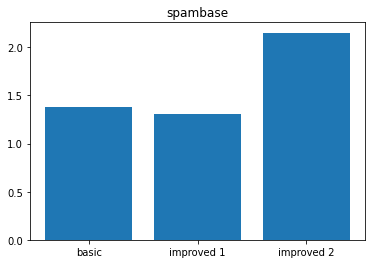

In [262]:
y = np.array([a, b, c])
get_graph(y,'spambase' )

# /10_V/gamespot_game_reviews.csv

In [263]:
file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/10_V/Dry_Bean.csv')
col_names = list(file.head(0))
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/10_V/Dry_Bean.csv", header=0, names=col_names)
# pima = fill_missing_values(pima)

# pima = pd.get_dummies(pima)
# pima.head()

# pima = pd.get_dummies(pima, prefix=['SEKER', 'DERMASON', 'SIRA', 'HOROZ','CALI','BOMBAY','BARBUNYA'], columns=['Class'])
# pima.columns

mapping = {'SEKER': 1, 'DERMASON': 2, 'SIRA': 3,
           'HOROZ': 4, 'CALI': 5, 
           'BOMBAY': 6, 'BARBUNYA': 7}
cols = ['Class']
pima = convert_string_value_to_int(pima,mapping, cols)

pima = fill_missing_values(pima)


# pima = pima.head(2000)

print("pima.first:")
print(list(pima.columns.values))

print(pima)
#split dataset in features and target variable
feature_cols =  list(pima.columns.values)
f = 'age'
feature_cols.remove('Class')
X = pima[feature_cols] # Features
y = pima.Class # Target variable

pima.first:
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']
        Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4  Class
0      28395    610.291       208.178117  ...      0.834222      0.998724      1
1      28734    638.018       200.524796  ...      0.909851      0.998430      1
2      29380    624.110       212.826130  ...      0.825871      0.999066      1
3      30008    645.884       210.557999  ...      0.861794      0.994199      1
4      30140    620.134       201.847882  ...      0.941900      0.999166      1
...      ...        ...              ...  ...           ...           ...    ...
13606  42097    759.696       288.721612  ...      0.642988      0.998385      2
13607  42101    757.499       281.576392  ...      0.676099      0.998219      2
13608  42139 

In [264]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [265]:
label = 'Class'
columnsNames = feature_cols

In [266]:
a,b,c = calculate_cascade(label, columnsNames, X_train, y_train,X_test, y_test)

log-loss: 2.1355339283091834
log-loss: 2.1711123255786497
log-loss: 2.8265172384833437


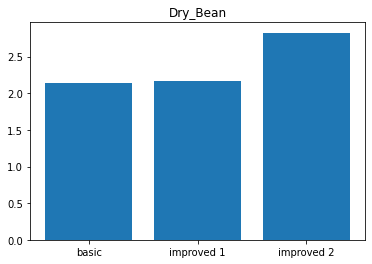

In [267]:
y = np.array([a, b, c])
get_graph(y,'Dry_Bean' )